In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Load data
train_data = pd.read_excel("THA2train.xlsx")
validate_data = pd.read_excel("THA2validate.xlsx")

# Extract features and labels
train_X = train_data.iloc[:, :-1].values
train_y = train_data.iloc[:, -1].values.reshape(-1, 1)

validate_X = validate_data.iloc[:, :-1].values
validate_y = validate_data.iloc[:, -1].values.reshape(-1, 1)


In [3]:
# Normalize features (Preprocessing step)
train_X = (train_X - np.mean(train_X, axis=0)) / np.std(train_X, axis=0)
validate_X = (validate_X - np.mean(validate_X, axis=0)) / np.std(validate_X, axis=0)

# One-hot encode labels to represent categorical variables
one_hot_train_y = np.eye(2)[train_y.flatten()]
one_hot_validate_y = np.eye(2)[validate_y.flatten()]


In [4]:
# Define activation functions
#ReLU is widely used in hidden layers as it allows the model to learn complex patterns and representations.
def relu(x):
    return np.maximum(0, x)

#The Sigmoid function is commonly used in the output layer of binary classification models
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define loss function
def binary_cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


In [5]:
# Initialize parameters
input_size = 2
hidden_size = 10
output_size = 2



In [6]:
# Training parameters
#learning_rate = 0.1
epochs = 1000
batch_size = 32

# Early stopping parameters
#patience = 20
#best_loss = np.inf
#early_stop_count = 0


In [7]:
# Define possible values for learning rate and weight initialization
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
initialization_std_devs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Store results
results = []

def plot_hidden_layer_outputs(hidden_outputs, title=''):
    sns.heatmap(hidden_outputs, cmap='viridis')
    plt.title(title)
    plt.xlabel('Hidden Neuron ID')
    plt.ylabel('Data Point ID')
    plt.show()

Epoch: 0, Training Loss: 0.6931471925791883, Validation Loss: 0.6931471805599451
Epoch: 1, Training Loss: 0.693147192579164, Validation Loss: 0.6931471805599454
Epoch: 2, Training Loss: 0.6931471925791395, Validation Loss: 0.6931471805599454
Epoch: 3, Training Loss: 0.6931471925791151, Validation Loss: 0.6931471805599451
Epoch: 4, Training Loss: 0.6931471925790907, Validation Loss: 0.6931471805599454
Epoch: 5, Training Loss: 0.6931471925790663, Validation Loss: 0.6931471805599454
Epoch: 6, Training Loss: 0.6931471925790418, Validation Loss: 0.6931471805599451
Epoch: 7, Training Loss: 0.6931471925790175, Validation Loss: 0.6931471805599454
Epoch: 8, Training Loss: 0.693147192578993, Validation Loss: 0.6931471805599454
Epoch: 9, Training Loss: 0.6931471925789686, Validation Loss: 0.6931471805599453
Epoch: 10, Training Loss: 0.6931471925789443, Validation Loss: 0.6931471805599451
Epoch: 11, Training Loss: 0.6931471925789198, Validation Loss: 0.6931471805599454
Epoch: 12, Training Loss: 0.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4664\2839085376.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4664\2839085376.py:12: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


Epoch: 812, Training Loss: nan, Validation Loss: nan
Epoch: 813, Training Loss: nan, Validation Loss: nan
Epoch: 814, Training Loss: nan, Validation Loss: nan
Epoch: 815, Training Loss: nan, Validation Loss: nan
Epoch: 816, Training Loss: nan, Validation Loss: nan
Epoch: 817, Training Loss: nan, Validation Loss: nan
Epoch: 818, Training Loss: nan, Validation Loss: nan
Epoch: 819, Training Loss: nan, Validation Loss: nan
Epoch: 820, Training Loss: nan, Validation Loss: nan
Epoch: 821, Training Loss: nan, Validation Loss: nan
Epoch: 822, Training Loss: nan, Validation Loss: nan
Epoch: 823, Training Loss: nan, Validation Loss: nan
Epoch: 824, Training Loss: nan, Validation Loss: nan
Epoch: 825, Training Loss: nan, Validation Loss: nan
Epoch: 826, Training Loss: nan, Validation Loss: nan
Epoch: 827, Training Loss: nan, Validation Loss: nan
Epoch: 828, Training Loss: nan, Validation Loss: nan
Epoch: 829, Training Loss: nan, Validation Loss: nan
Epoch: 830, Training Loss: nan, Validation Los

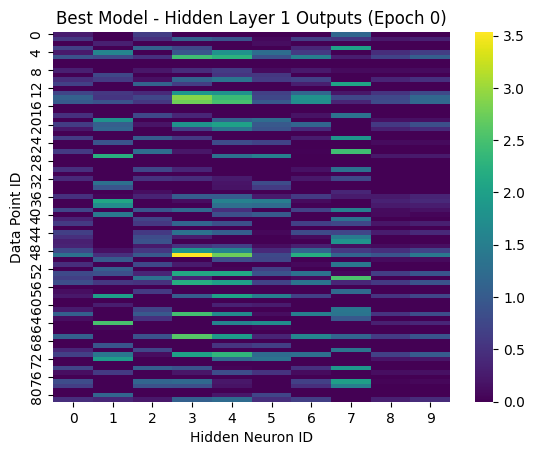

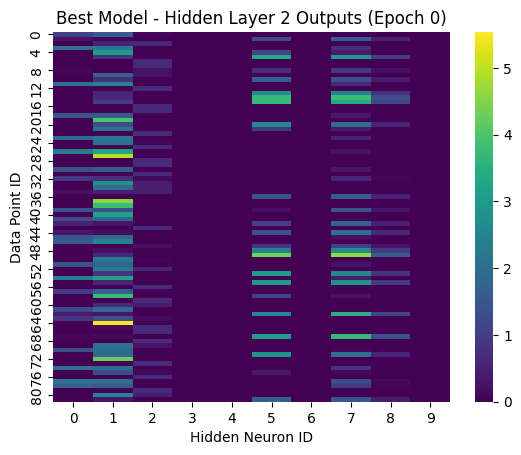

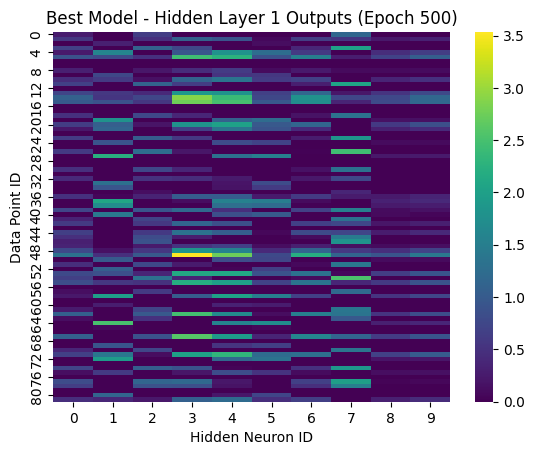

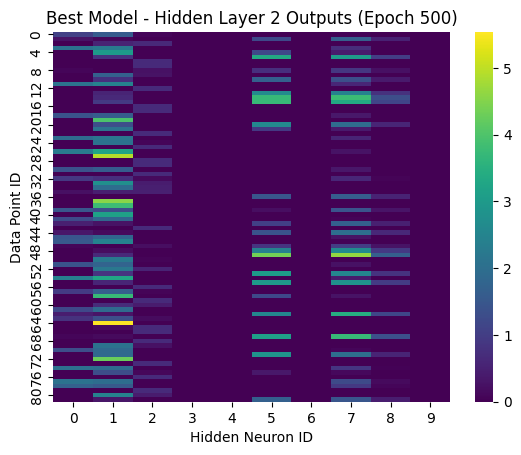

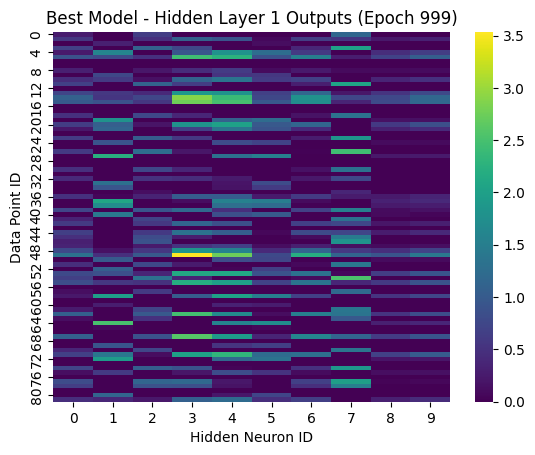

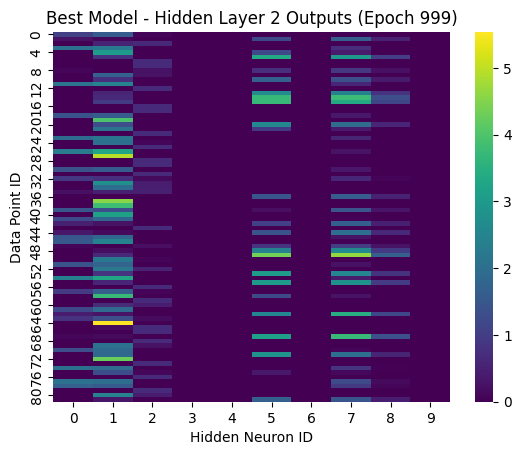

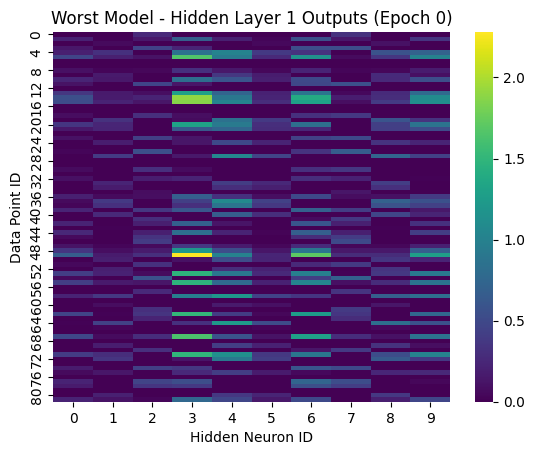

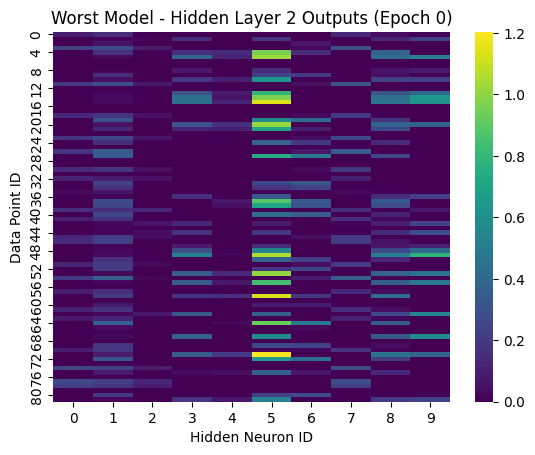

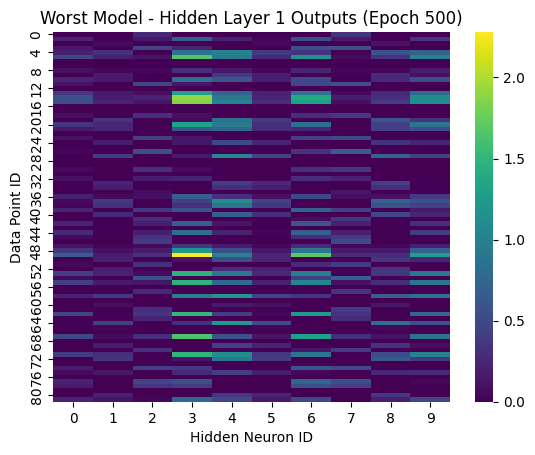

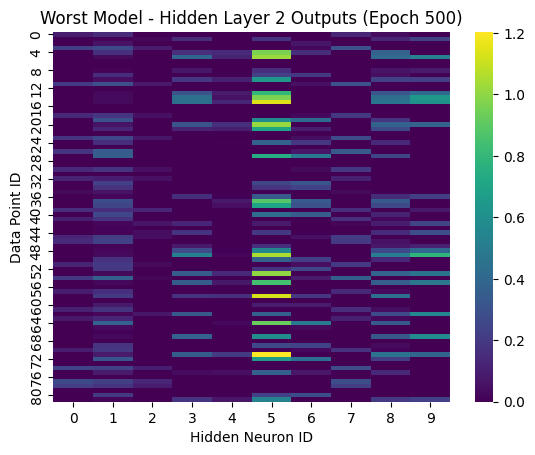

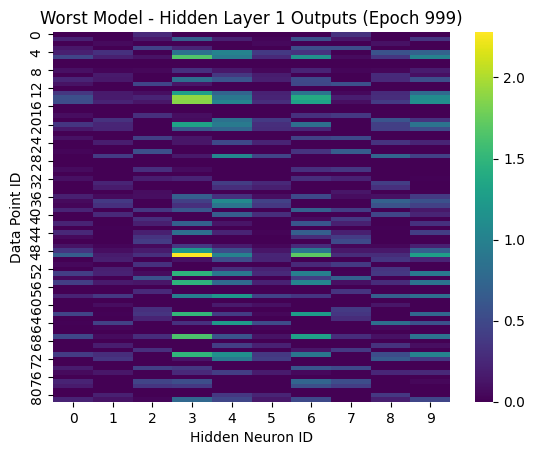

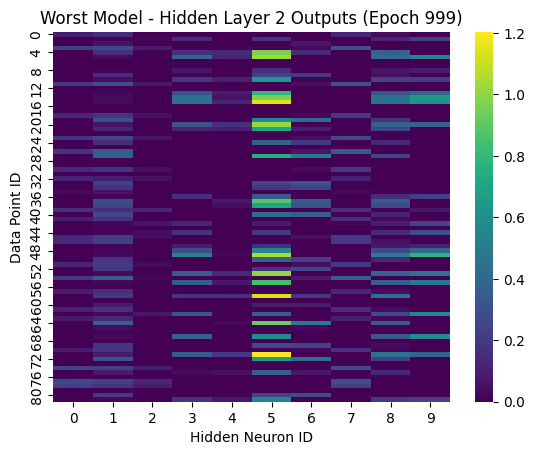

In [8]:
import seaborn as sns

# Store best and worst models
best_model = None
worst_model = None
best_accuracy = 0
worst_accuracy = float("inf")


# Loop over different learning rates and initializations
for lr in learning_rates:
    for std_dev in initialization_std_devs:
        # Initialize weights and biases
        np.random.seed(42)
        weights_0 = np.random.randn(input_size, hidden_size) * std_dev
        bias_0 = np.zeros((1, hidden_size))

        weights_1 = np.random.randn(hidden_size, hidden_size) * std_dev
        bias_1 = np.zeros((1, hidden_size))

        weights_2 = np.random.randn(hidden_size, output_size) * std_dev
        bias_2 = np.zeros((1, output_size))

        # Set the learning rate
        learning_rate = lr

        # Reset training and validation losses
        training_losses = []
        validation_losses = []

        for epoch in range(epochs):
            for i in range(0, len(train_X), batch_size):
                # Mini-batch
                X_batch = train_X[i : i + batch_size]
                y_batch = one_hot_train_y[i : i + batch_size]

                # Forward pass
                layer_0 = X_batch
                layer_1 = relu(np.dot(layer_0, weights_0) + bias_0)
                layer_2 = relu(np.dot(layer_1, weights_1) + bias_1)
                output = sigmoid(np.dot(layer_2, weights_2) + bias_2)

                # Calculate loss
                loss = binary_cross_entropy_loss(y_batch, output)

                # Backward pass
                d_output = output - y_batch
                d_layer_2 = np.dot(d_output, weights_2.T) * (layer_2 > 0)
                d_layer_1 = np.dot(d_layer_2, weights_1.T) * (layer_1 > 0)

                # Update weights and biases
                weights_2 -= learning_rate * np.dot(layer_2.T, d_output) / batch_size
                bias_2 -= (
                    learning_rate * np.sum(d_output, axis=0, keepdims=True) / batch_size
                )

                weights_1 -= learning_rate * np.dot(layer_1.T, d_layer_2) / batch_size
                bias_1 -= (
                    learning_rate
                    * np.sum(d_layer_2, axis=0, keepdims=True)
                    / batch_size
                )

                weights_0 -= learning_rate * np.dot(layer_0.T, d_layer_1) / batch_size
                bias_0 -= (
                    learning_rate
                    * np.sum(d_layer_1, axis=0, keepdims=True)
                    / batch_size
                )

            # Calculate validation loss
            layer_1_val = relu(np.dot(validate_X, weights_0) + bias_0)
            layer_2_val = relu(np.dot(layer_1_val, weights_1) + bias_1)
            output_val = sigmoid(np.dot(layer_2_val, weights_2) + bias_2)
            val_loss = binary_cross_entropy_loss(one_hot_validate_y, output_val)

            # Print loss and check for early stopping
            print(f"Epoch: {epoch}, Training Loss: {loss}, Validation Loss: {val_loss}")

            # Store losses for plotting
            training_losses.append(loss)
            validation_losses.append(val_loss)

        # Calculate final accuracy on the validation set
        predicted_labels = np.argmax(output_val, axis=1)
        accuracy = np.mean(predicted_labels == validate_y.flatten())

        # Store the best and worst models
        if accuracy > best_accuracy:
            best_model = {
                "lr": lr,
                "std_dev": std_dev,
                "weights_0": weights_0,
                "weights_1": weights_1,
                "weights_2": weights_2,
                "bias_0": bias_0,
                "bias_1": bias_1,
                "bias_2": bias_2,
            }
            best_accuracy = accuracy

        if accuracy < worst_accuracy:
            worst_model = {
                "lr": lr,
                "std_dev": std_dev,
                "weights_0": weights_0,
                "weights_1": weights_1,
                "weights_2": weights_2,
                "bias_0": bias_0,
                "bias_1": bias_1,
                "bias_2": bias_2,
            }
            worst_accuracy = accuracy

    # Visualize hidden layer outputs for the best model
for epoch in [0, epochs // 2, epochs - 1]:
    layer_1_best = relu(
        np.dot(validate_X, best_model["weights_0"]) + best_model["bias_0"]
    )
    layer_2_best = relu(
        np.dot(layer_1_best, best_model["weights_1"]) + best_model["bias_1"]
    )
    output_best = sigmoid(
        np.dot(layer_2_best, best_model["weights_2"]) + best_model["bias_2"]
    )
    plot_hidden_layer_outputs(
        layer_1_best, title=f"Best Model - Hidden Layer 1 Outputs (Epoch {epoch})"
    )
    plot_hidden_layer_outputs(
        layer_2_best, title=f"Best Model - Hidden Layer 2 Outputs (Epoch {epoch})"
    )

# Visualize hidden layer outputs for the worst model
for epoch in [0, epochs // 2, epochs - 1]:
    layer_1_worst = relu(
        np.dot(validate_X, worst_model["weights_0"]) + worst_model["bias_0"]
    )
    layer_2_worst = relu(
        np.dot(layer_1_worst, worst_model["weights_1"]) + worst_model["bias_1"]
    )
    output_worst = sigmoid(
        np.dot(layer_2_worst, worst_model["weights_2"]) + worst_model["bias_2"]
    )
    plot_hidden_layer_outputs(
        layer_1_worst, title=f"Worst Model - Hidden Layer 1 Outputs (Epoch {epoch})"
    )
    plot_hidden_layer_outputs(
        layer_2_worst, title=f"Worst Model - Hidden Layer 2 Outputs (Epoch {epoch})"
    )